# Demonstration: Anomaly detection algorithm

In [1]:
from pennylane import numpy as np
from matplotlib import pyplot as plt

from PhaseEstimation import encoder as enc, vqe

In [2]:
lr = .3
epochs = 3000

In [3]:
myvqe = vqe.load_vqe('./data/sample_vqe') # Load VQE
myenc  = enc.encoder(myvqe, enc.encoder_circuit)           # Construct Encoder

In [4]:
print(myenc)

0: ──||──||──RY(0.00)──────────╭C─────||──RZ(6.00)───────────╭C────────||──RZ(12.00)──────────╭C───
1: ──||──||──RY(1.00)──────────│──╭C──||──RZ(7.00)───────────│──╭C─────||──RZ(13.00)──────────│──╭C
2: ──||──||──RY(2.00)─╭C────╭Z─╰X─│───||──RZ(8.00)──╭C─╭Z────│──│──╭X──||──RZ(14.00)─╭C────╭Z─│──╰X
3: ──||──||──RY(3.00)─╰Z─╭C─│─────╰X──||──RZ(9.00)──│──╰C─╭Z─╰X─│──│───||──RZ(15.00)─╰Z─╭C─│──│──╭X
4: ──||──||──RY(4.00)────╰Z─╰C─╭X─────||──RZ(10.00)─╰Z────╰C────╰X─│───||──RZ(16.00)────╰Z─╰C─╰X─│─
5: ──||──||──RY(5.00)──────────╰C─────||──RZ(11.00)────────────────╰C──||──RZ(17.00)─────────────╰C

───||──RZ(18.00)─┤     
───||──RZ(19.00)─┤     
───||──RZ(20.00)─┤  <Z>
───||──RZ(21.00)─┤  <Z>
───||──RZ(22.00)─┤  <Z>
───||──RZ(23.00)─┤     


In [5]:
sidex, sidey = myenc.vqe.Hs.n_kappas, myenc.vqe.Hs.n_hs
trainingpoints = [0,sidey-1, sidey*sidex - sidey]

Cost: 1.430511474609375e-06: 100%|██████████| 3000/3000 [00:13<00:00, 221.50it/s] 


/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

divide by zero encountered in divide

/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

invalid value encountered in multiply



1


<Figure size 640x480 with 0 Axes>

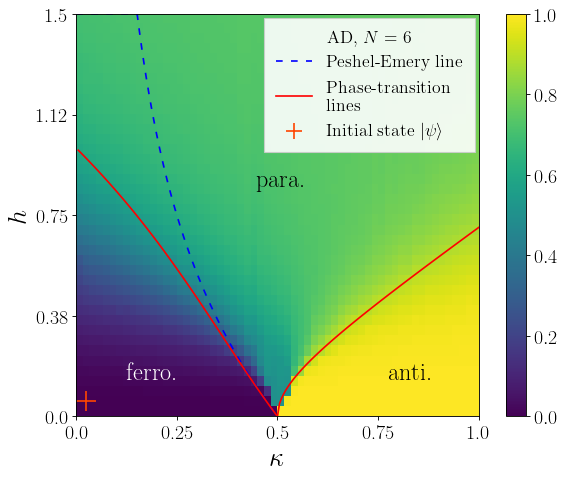

Cost: 0.2261749505996704: 100%|██████████| 3000/3000 [00:11<00:00, 255.72it/s] 


1


/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

divide by zero encountered in divide

/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

invalid value encountered in multiply



<Figure size 640x480 with 0 Axes>

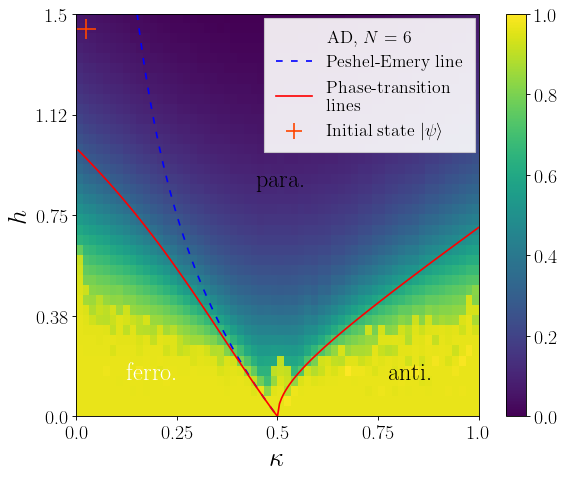

Cost: 1.7762184143066406e-05: 100%|██████████| 3000/3000 [00:12<00:00, 242.37it/s]


<Figure size 640x480 with 0 Axes>

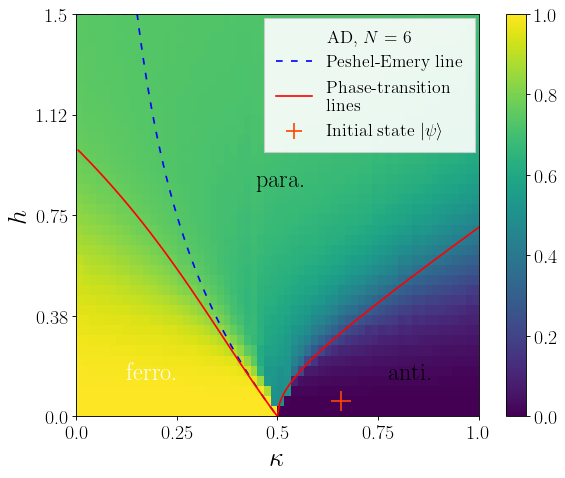

In [6]:
for trainingpoint in trainingpoints:
    myenc  = enc.encoder(myvqe, enc.encoder_circuit)
    myenc.train(lr, epochs, np.array([trainingpoint]), circuit = False)
    myenc.show_compression(trainingpoint = trainingpoint, plot3d = True)
    
    plt.show()